In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import numpy as np

In [2]:
x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y=torch.tensor([0,1,1,0],dtype=torch.float32)

In [3]:
loss_list=[]
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1=nn.Linear(2,2,bias=True)
        self.activation1=nn.ReLU()
        self.linear2=nn.Linear(2,1,bias=True)
    def forward(self,x):
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        return x

In [4]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].to(device),self.Y[idx].to(device)
full_dataset=MyDataset(x,y)
tdl=DataLoader(full_dataset,batch_size=1,shuffle=True)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=XORModel().to(device)
print(model)
        

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [5]:
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.03)

In [6]:
def train_one_epoch(ei):
    totalloss=0
    for i,data in enumerate(tdl):
        inputs,labels=data
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    return totalloss/(len(tdl)*1)
    
for epoch in range(10000):
    model.train(True)
    avg_loss=train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000==0:
        print(f'Epoch{epoch}/{10000},Loss:{avg_loss}')

    

Epoch0/10000,Loss:0.3225237727165222
Epoch1000/10000,Loss:7.355227538141662e-14
Epoch2000/10000,Loss:7.088774012231625e-14
Epoch3000/10000,Loss:6.955547249276606e-14
Epoch4000/10000,Loss:7.216449660063518e-14
Epoch5000/10000,Loss:6.80566714095221e-14
Epoch6000/10000,Loss:6.156186671546493e-14
Epoch7000/10000,Loss:7.777112287499222e-14
Epoch8000/10000,Loss:6.261657858885883e-14
Epoch9000/10000,Loss:7.777112287499222e-14


parameters=Parameter containing:
tensor([[ 0.8765, -0.8782],
        [-0.9504,  0.9520]], device='cuda:0', requires_grad=True),no of params=4
parameters=Parameter containing:
tensor([ 1.7697e-01, -1.8445e-07], device='cuda:0', requires_grad=True),no of params=6
parameters=Parameter containing:
tensor([[1.1410, 1.2625]], device='cuda:0', requires_grad=True),no of params=8
parameters=Parameter containing:
tensor([-0.2019], device='cuda:0', requires_grad=True),no of params=9
input is tensor([1., 0.], device='cuda:0')
output tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


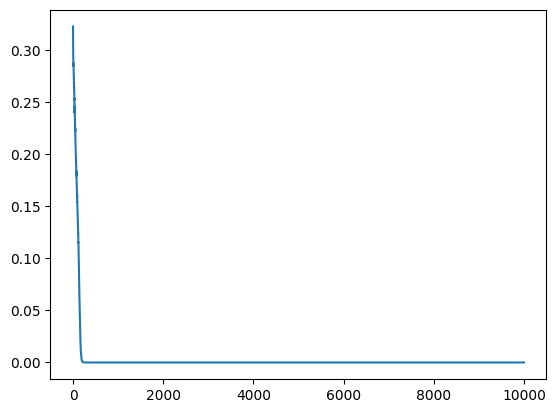

In [11]:
cofp=0
for name, param in model.named_parameters():
    if 'weight' in name or 'bias' in name:
        cofp += param.numel()
    print("parameters={},no of params={}".format(param,cofp))
input=torch.tensor([1,0],dtype=torch.float32).to(device)
model.eval()
print("input is {}".format(input))
print("output {}".format(model(input)))
plt.plot(loss_list)
plt.show()

tensor([[0.7408],
        [0.7479],
        [0.7303],
        [0.7408]], device='cuda:0', grad_fn=<MulBackward0>)
Model's output:
[0.99999976]
